<h2>Importing Packages</h2>

In [1]:
import os
import sys
import urllib
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.svm import SVR
from scipy import stats
from sklearn.decomposition import PCA
from scipy.stats import expon, reciprocal

In [3]:
!pip install --user mlflow

  Using cached mlflow-1.24.0-py3-none-any.whl (16.5 MB)
  Using cached alembic-1.7.7-py3-none-any.whl (210 kB)
  Using cached databricks_cli-0.16.4-py3-none-any.whl
  Using cached waitress-2.1.0-py3-none-any.whl (56 kB)
  Using cached prometheus_flask_exporter-0.19.0-py3-none-any.whl (18 kB)
  Using cached docker-5.0.3-py2.py3-none-any.whl (146 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached sqlparse-0.4.2-py3-none-any.whl (42 kB)
  Using cached importlib_metadata-4.11.3-py3-none-any.whl (18 kB)
  Using cached Flask-2.0.3-py3-none-any.whl (95 kB)
  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
  Using cached GitPython-3.1.27-py3-none-any.whl (181 kB)
  Using cached pywin32-227-cp39-cp39-win_amd64.whl (9.1 MB)
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
  Using cached Mako-1.2.0-py3-none-any.whl (78 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\siddhant.sharma\\AppData\\Roaming\\Python\\Python39\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Check the permissions.



In [4]:
import mlflow
import mlflow.sklearn

<h2>Fetching Dataset</h2>

In [5]:
downloadRoot = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
houseDatasetPath = "datasets/housing"
downloadURL = downloadRoot + houseDatasetPath + "/housing.tgz"

In [6]:
def fetchData(hURL = downloadURL, hPath = houseDatasetPath):
    if not os.path.isdir(hPath):
        os.makedirs(hPath)
    tgzPath = os.path.join(hPath, "housing.tgz")
    urllib.request.urlretrieve(hURL, tgzPath)
    housingTgz = tarfile.open(tgzPath)
    housingTgz.extractall(path = hPath)
    housingTgz.close()

In [7]:
fetchData()

In [8]:
PROJECT_ROOT_DIR = '.'
imagePath = os.path.join(PROJECT_ROOT_DIR, 'images')
os.makedirs(imagePath, exist_ok = True)
imageFileName = "california.png"
imageUrl = downloadRoot + 'images/end_to_end_project/' + imageFileName

In [9]:
urllib.request.urlretrieve(imageUrl, os.path.join(imagePath, imageFileName))

('.\\images\\california.png', <http.client.HTTPMessage at 0x2ae579a9bb0>)

<h2>Loading CSV File</h2>

In [10]:
def loadData(housingPath = houseDatasetPath):
    csvPath = os.path.join(housingPath, "housing.csv")
    return pd.read_csv(csvPath)

In [11]:
houseDf = loadData()

In [12]:
houseDf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<h2>Quick Look At Dataset</h2>

In [13]:
houseDf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
houseDf.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [15]:
houseDf.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [16]:
houseDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
houseDf.dropna(subset = ['total_bedrooms'], inplace = True)

In [18]:
len(houseDf)

20433

In [19]:
for i in houseDf.columns:
    print(i,":", houseDf[i].isnull().values.any())

longitude : False
latitude : False
housing_median_age : False
total_rooms : False
total_bedrooms : False
population : False
households : False
median_income : False
median_house_value : False
ocean_proximity : False


<AxesSubplot:>

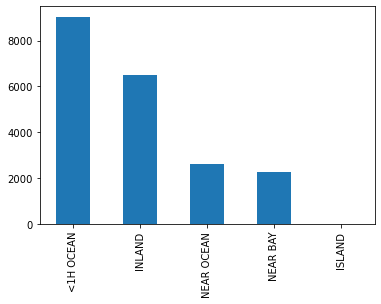

In [20]:
houseDf['ocean_proximity'].value_counts().plot(kind = 'bar')

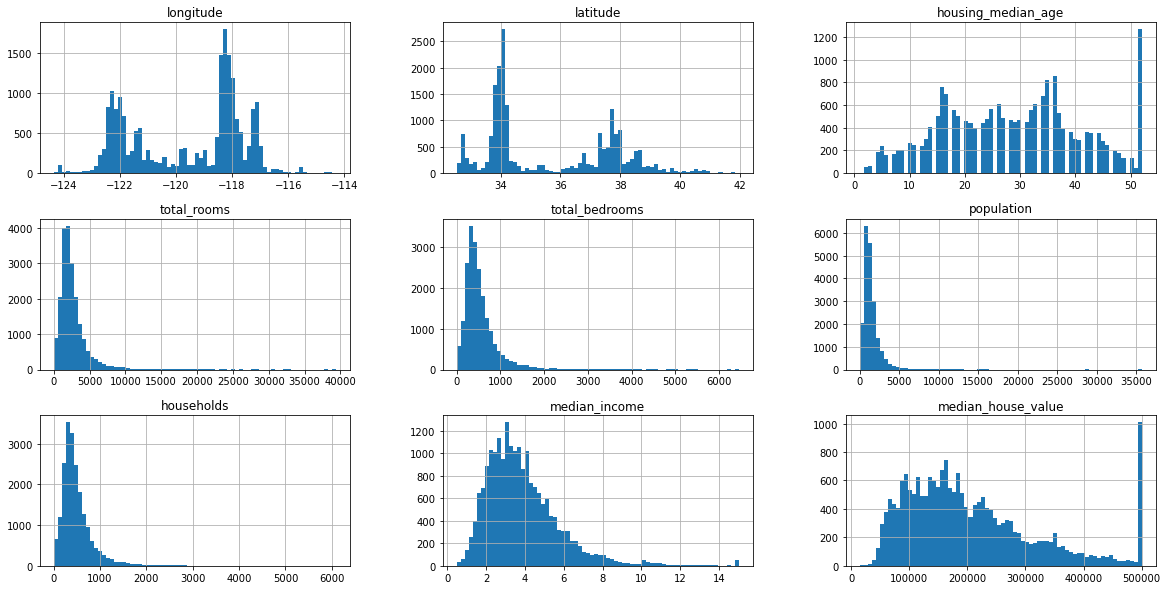

In [21]:
ax = houseDf.hist(bins = 70, figsize = (20, 10))

<AxesSubplot:>

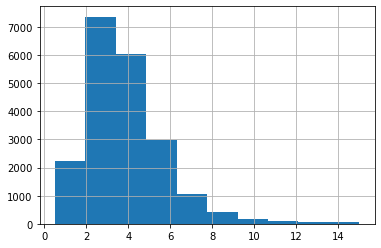

In [22]:
houseDf['median_income'].hist()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

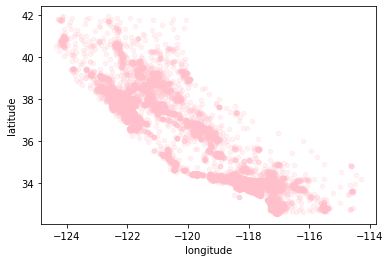

In [23]:
houseDf.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.2, color = "pink")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

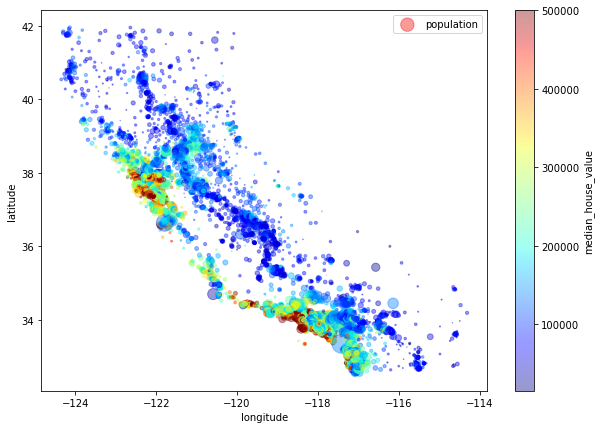

In [24]:
houseDf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=houseDf["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

In [25]:
def plotOnMap(df):
    californiaImage = mpimg.imread(os.path.join(imagePath, imageFileName))
    ax = df.plot(kind = 'scatter', x ='longitude', y = 'latitude', alpha = 0.4, s = df['population']/100,
                 label = 'population', figsize = (10, 10), c ='median_house_value', cmap = plt.get_cmap('jet'),
                 colorbar = True, sharex = False)
    plt.imshow(californiaImage, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.6, cmap = plt.get_cmap('jet'))
    plt.ylabel('Latitude', fontsize = 15)
    plt.xlabel('Longitude', fontsize = 15)

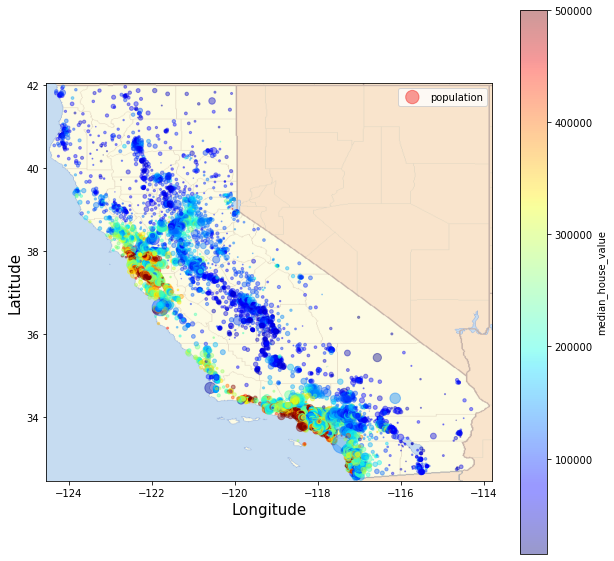

In [26]:
plotOnMap(houseDf)

<h2>Train Test Split</h2>

In [27]:
incomeCatHouseDf = houseDf.copy(deep = True)
incomeCatHouseDf['incomeCategory'] = pd.cut(houseDf['median_income'], 
                          bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels = [1, 2, 3, 4, 5]
                          )

In [28]:
incomeCatHouseDf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,incomeCategory
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [29]:
len(incomeCatHouseDf)

20433

<AxesSubplot:>

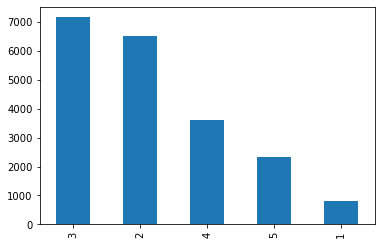

In [30]:
incomeCatHouseDf['incomeCategory'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

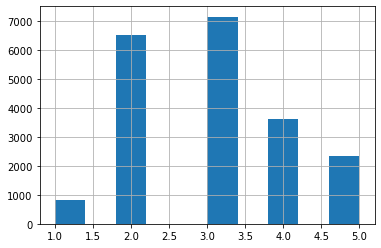

In [31]:
incomeCatHouseDf['incomeCategory'].hist()

In [32]:
trainRandomSet, testRandomSet = train_test_split(incomeCatHouseDf, test_size = 0.2, random_state = 50)

In [33]:
print("Rows in train set: ", trainRandomSet.shape[0])
print("Rows in test set: ", testRandomSet.shape[0])

Rows in train set:  16346
Rows in test set:  4087


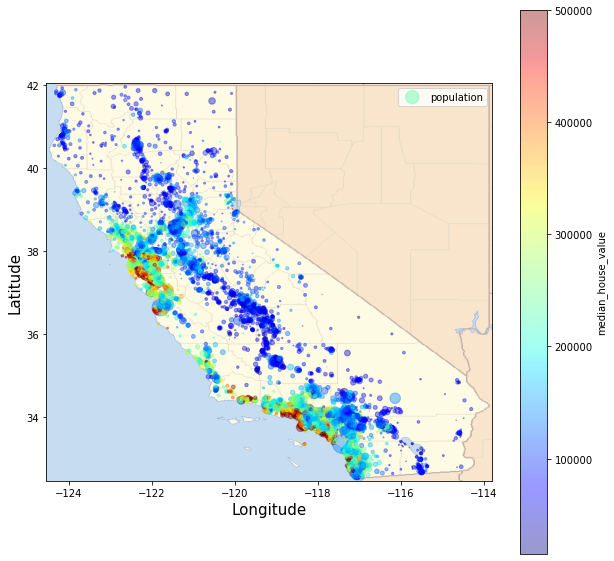

In [34]:
plotOnMap(trainRandomSet)

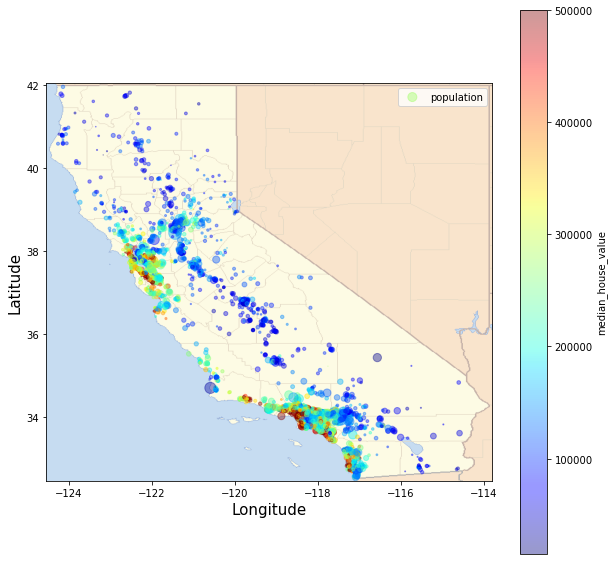

In [35]:
plotOnMap(testRandomSet)

In [36]:
stratifiedSplit = StratifiedShuffleSplit(n_splits = 2, test_size = 0.2, random_state = 50)

In [37]:
for trainIndex, testIndex in stratifiedSplit.split(incomeCatHouseDf, incomeCatHouseDf['incomeCategory']):
    stratifiedTrainSet = incomeCatHouseDf.iloc[trainIndex]
    stratifiedTestSet = incomeCatHouseDf.iloc[testIndex]

In [38]:
print("Rows in train set: ", stratifiedTrainSet.shape[0])
print("Rows in test set: ", stratifiedTestSet.shape[0])

Rows in train set:  16346
Rows in test set:  4087


In [39]:
def incomeCategoryProportion(df):
    return df['incomeCategory'].value_counts()/len(df)

In [40]:
compareProps = pd.DataFrame({
    "overall" : incomeCategoryProportion(incomeCatHouseDf),
    "stratified" : incomeCategoryProportion(stratifiedTrainSet),
    "random" : incomeCategoryProportion(trainRandomSet),
}).sort_index()

In [41]:
compareProps['Random % Error'] = 100*compareProps['random']/compareProps['overall'] - 100
compareProps['Stratified % Error'] = 100*compareProps['stratified']/compareProps['overall'] - 100

In [42]:
compareProps

,overall,stratified,random,Random % Error,Stratified % Error
1,0.039838,0.039826,0.039582,-0.642532,-0.028266
2,0.318847,0.318855,0.322097,1.019356,0.002447
3,0.350218,0.350239,0.350422,0.058346,0.005941
4,0.176724,0.176740,0.175456,-0.717593,0.009371
5,0.114374,0.114340,0.112443,-1.687795,-0.029646


In [43]:
for s in (stratifiedTrainSet, stratifiedTestSet):
    s.drop("incomeCategory", axis = 1, inplace = True)

C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<h2>Visualise the Training Set</h2>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

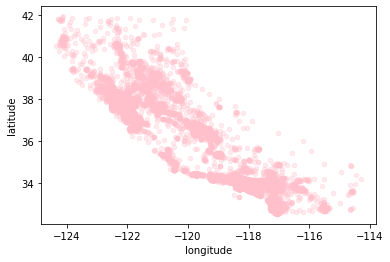

In [44]:
stratifiedTrainSet.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.3, color = 'pink')

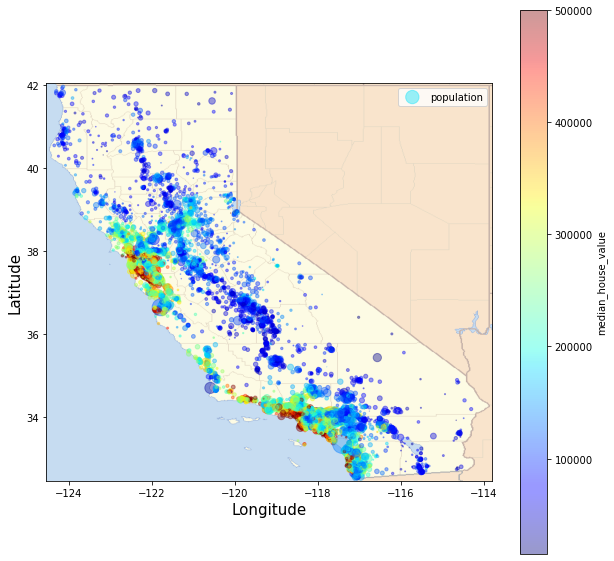

In [45]:
plotOnMap(stratifiedTrainSet)

In [46]:
stratifiedTrainSet.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924059,-0.113187,0.047749,0.073601,0.101011,0.059491,-0.018583,-0.051511
latitude,-0.924059,1.000000,0.017892,-0.038004,-0.069778,-0.109042,-0.074067,-0.076729,-0.139481
housing_median_age,-0.113187,0.017892,1.000000,-0.364702,-0.323880,-0.296613,-0.305738,-0.125067,0.098964
total_rooms,0.047749,-0.038004,-0.364702,1.000000,0.930904,0.857919,0.919872,0.203529,0.137973
total_bedrooms,0.073601,-0.069778,-0.323880,0.930904,1.000000,0.877359,0.979550,-0.001440,0.055485
population,0.101011,-0.109042,-0.296613,0.857919,0.877359,1.000000,0.907065,0.012105,-0.020090
households,0.059491,-0.074067,-0.305738,0.919872,0.979550,0.907065,1.000000,0.020058,0.070865
median_income,-0.018583,-0.076729,-0.125067,0.203529,-0.001440,0.012105,0.020058,1.000000,0.686465
median_house_value,-0.051511,-0.139481,0.098964,0.137973,0.055485,-0.020090,0.070865,0.686465,1.000000


<AxesSubplot:>

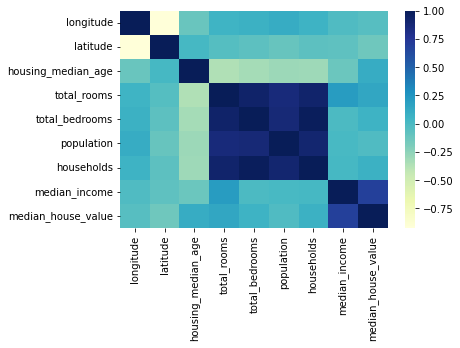

In [47]:
sns.heatmap(stratifiedTrainSet.corr(), cmap = 'YlGnBu')

In [48]:
corrMatrix = stratifiedTrainSet.corr()
corrMatrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.686465
total_rooms           0.137973
housing_median_age    0.098964
households            0.070865
total_bedrooms        0.055485
population           -0.020090
longitude            -0.051511
latitude             -0.139481
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

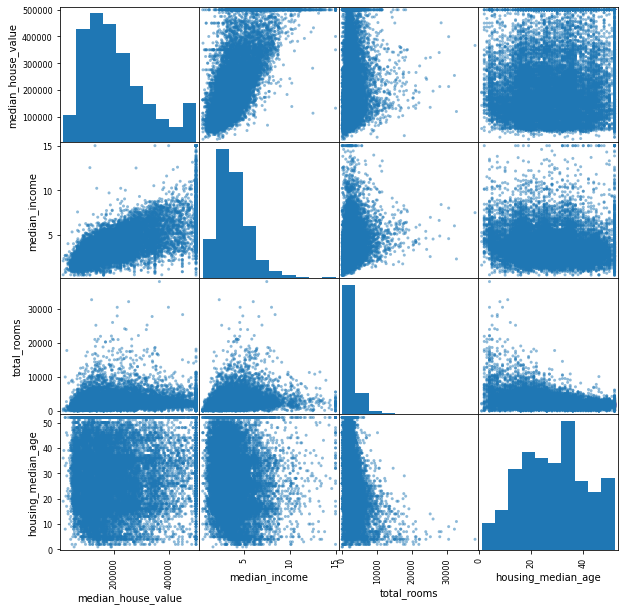

In [49]:
scatterMatrixAttributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(stratifiedTrainSet[scatterMatrixAttributes], figsize = (10, 10))

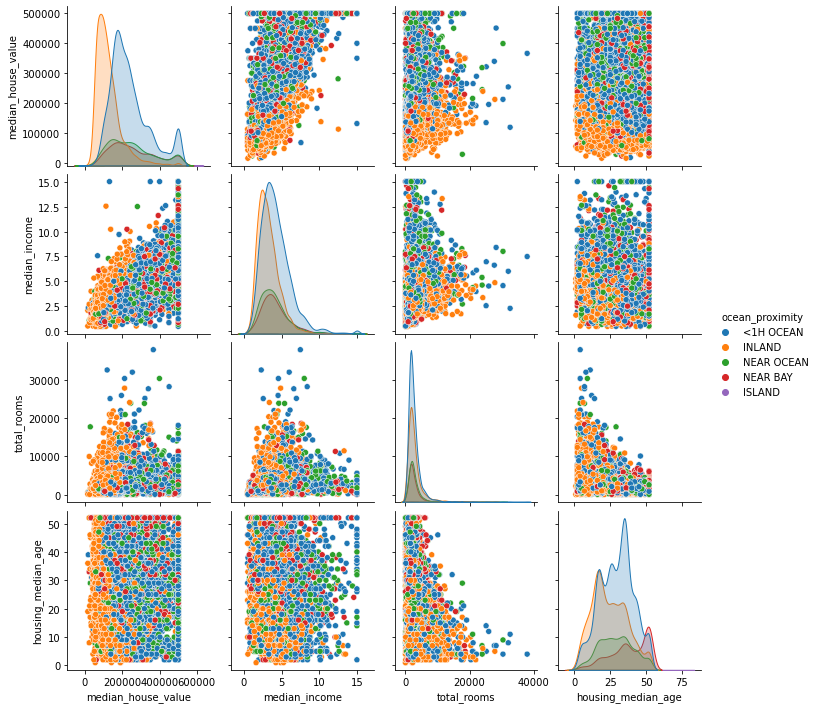

In [50]:
snsPairPlotAttributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'ocean_proximity']
sns.pairplot(stratifiedTrainSet[snsPairPlotAttributes], hue = 'ocean_proximity')

In [51]:
alternativeAttributeCombinationDf = houseDf.copy(deep = True)
alternativeAttributeCombinationDf['roomsPerHousehold'] = alternativeAttributeCombinationDf['total_rooms']/alternativeAttributeCombinationDf['households']
alternativeAttributeCombinationDf['bedroomPerHousehold'] = alternativeAttributeCombinationDf['total_bedrooms']/alternativeAttributeCombinationDf['total_rooms']
alternativeAttributeCombinationDf['populationPerHousehold'] = alternativeAttributeCombinationDf['population']/alternativeAttributeCombinationDf['households']

In [52]:
alternativeAttributeCombinationDf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,roomsPerHousehold,bedroomPerHousehold,populationPerHousehold
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [53]:
corrMatrix = alternativeAttributeCombinationDf.corr()

In [54]:
corrMatrix['median_house_value'].sort_values(ascending = False)

median_house_value        1.000000
median_income             0.688355
roomsPerHousehold         0.151344
total_rooms               0.133294
housing_median_age        0.106432
households                0.064894
total_bedrooms            0.049686
populationPerHousehold   -0.023639
population               -0.025300
longitude                -0.045398
latitude                 -0.144638
bedroomPerHousehold      -0.255880
Name: median_house_value, dtype: float64

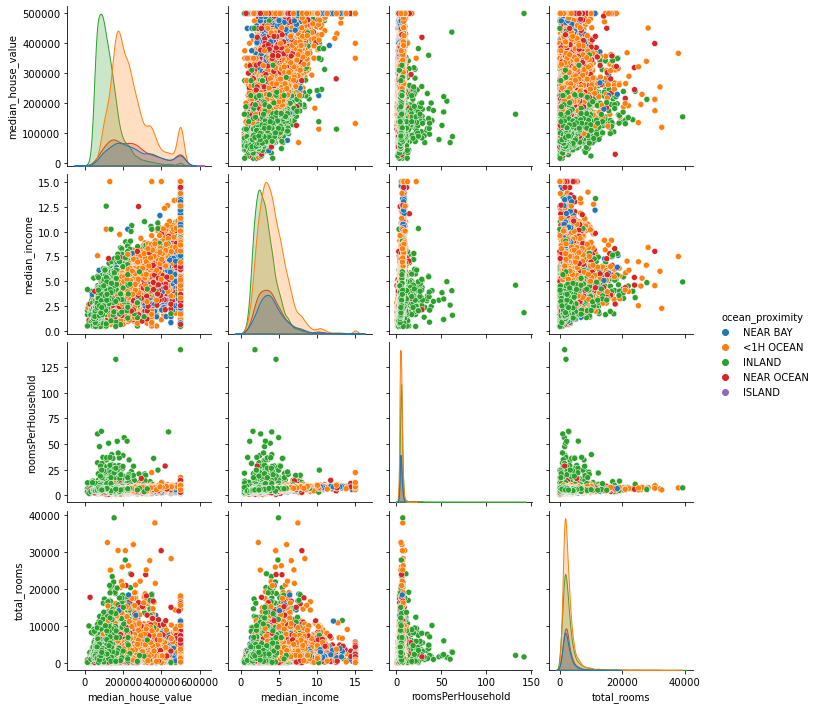

In [55]:
snsPairPlotAttributes = ['median_house_value', 'median_income', 'roomsPerHousehold', 'total_rooms', 'ocean_proximity']
sns.pairplot(alternativeAttributeCombinationDf[snsPairPlotAttributes], hue = 'ocean_proximity')

(0.0, 10.0, 0.0, 520000.0)

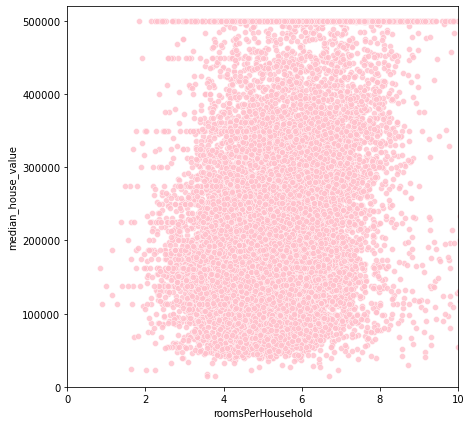

In [56]:
fig = plt.gcf()
fig.set_size_inches(7, 7)
sns.scatterplot(data = alternativeAttributeCombinationDf, x = 'roomsPerHousehold', y = 'median_house_value', alpha = 0.8, color = 'pink')
plt.axis([0, 10, 0, 520000])

<h2>Data Preparation</h2>

In [57]:
trainingValueX = stratifiedTrainSet.drop("median_house_value", axis = 1)
trainingValueY = stratifiedTrainSet['median_house_value'].copy()

In [58]:
simpleImputer = SimpleImputer(strategy = 'median')

In [59]:
numericalTrainingValueX = trainingValueX.drop("ocean_proximity", axis = 1)

In [60]:
simpleImputer.fit(numericalTrainingValueX)

SimpleImputer(strategy='median')

In [61]:
simpleImputer.statistics_

array([-118.49   ,   34.26   ,   29.     , 2125.     ,  434.     ,
       1166.     ,  409.5    ,    3.53525])

In [62]:
numericalTrainingValueXArray = simpleImputer.transform(numericalTrainingValueX)

In [63]:
numericalTrainingValueX = pd.DataFrame(numericalTrainingValueXArray, columns = numericalTrainingValueX.columns, index = numericalTrainingValueX.index)
numericalTrainingValueX.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11232,-117.96,33.82,32.0,2856.0,622.0,1499.0,601.0,3.6300
9265,-119.81,36.92,14.0,4795.0,710.0,2047.0,640.0,4.6650
14738,-117.05,32.59,26.0,1919.0,345.0,1326.0,341.0,4.2679
17594,-121.91,37.30,31.0,616.0,131.0,185.0,107.0,3.6250
12924,-121.31,38.65,21.0,2759.0,409.0,1053.0,374.0,5.5000


In [64]:
oceanProximityColumn = trainingValueX[['ocean_proximity']]
oceanProximityColumn[:10]

,ocean_proximity
11232,<1H OCEAN
9265,INLAND
14738,NEAR OCEAN
17594,<1H OCEAN
12924,INLAND
9424,NEAR OCEAN
17519,<1H OCEAN
5969,INLAND
11804,INLAND
7929,<1H OCEAN


In [65]:
ordinalEncoder = OrdinalEncoder()
oceanProximityColumnEncoded = ordinalEncoder.fit_transform(oceanProximityColumn)
oceanProximityColumnEncoded[:10]

array([[0.],
       [1.],
       [4.],
       [0.],
       [1.],
       [4.],
       [0.],
       [1.],
       [1.],
       [0.]])

In [66]:
ordinalEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [67]:
coloumnNameForTransformer = ['total_rooms', 'total_bedrooms', 'population', 'households']
roomsIndex, bedroomIndex, populationIndex, householdIndex = [houseDf.columns.get_loc(c) for c in coloumnNameForTransformer]

In [68]:
class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, addBedroomsPerRoom = True):
        self.addBedroomsPerRoom = addBedroomsPerRoom
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, x):
        roomsPerHousehold = x[:, roomsIndex] / x[:, householdIndex]
        populationPerHousehold = x[:, bedroomIndex] / x[:, householdIndex]
        if self.addBedroomsPerRoom:
            bedroomsPerRoom = x[:, bedroomIndex] /x[:, roomsIndex]
            return np.c_[x, roomsPerHousehold, populationPerHousehold, bedroomsPerRoom]
        else:
            return np.c_[x, roomsPerHousehold, populationPerHousehold]

In [69]:
combinedAttributeAdder = CombinedAttributeAdder(addBedroomsPerRoom = False)
houseExtraAttributeAdder = combinedAttributeAdder.transform(houseDf.values)

In [70]:
houseDf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [71]:
houseExtraAttributeAdder = pd.DataFrame(
    houseExtraAttributeAdder,
    columns = list(houseDf.columns) + ["roomsPerHousehold", "populationPerHousehold"],
    index = houseDf.index
)

In [72]:
houseExtraAttributeAdder.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,roomsPerHousehold,populationPerHousehold
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.02381
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.97188
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081


<h2>Transform Pipeline</h2>

In [73]:
numericalPipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attributeAdder', CombinedAttributeAdder(addBedroomsPerRoom = False)),
    ('stdScaler', StandardScaler()),
    ('pca', PCA(n_components = 10))
])

In [74]:
numericalAttribute = list(numericalTrainingValueX)
categoryAttribute =['ocean_proximity']

In [75]:
combinedPipeline = ColumnTransformer([
    ('num', numericalPipeline, numericalAttribute),
    ('cat', OneHotEncoder(), categoryAttribute),
])

In [76]:
trainingValueXPrepared = combinedPipeline.fit_transform(trainingValueX)

In [77]:
trainingValueXPrepared.shape

(16346, 15)

<h2>Select and Train a Model</h2>

<h4>Linear Regression</h4>

In [78]:
linearRegression = LinearRegression()
linearRegression.fit(trainingValueXPrepared, trainingValueY)

LinearRegression()

In [79]:
linearRegressionPredict = linearRegression.predict(trainingValueXPrepared)

In [80]:
linearRegressionMAPE = mean_absolute_percentage_error(trainingValueY, linearRegressionPredict)
linearRegressionMAPE

0.28543963889701657

In [81]:
linearRegressionMSE = mean_squared_error(trainingValueY, linearRegressionPredict)
np.sqrt(linearRegressionMSE)

68369.95941339986

<h4>Decision Tree</h4>

In [82]:
treeRegressor = DecisionTreeRegressor(random_state = 50)
treeRegressor.fit(trainingValueXPrepared, trainingValueY)

DecisionTreeRegressor(random_state=50)

In [83]:
treeRegressorPred = treeRegressor.predict(trainingValueXPrepared)

In [84]:
treeRegressorMAPE = mean_absolute_percentage_error(trainingValueY, treeRegressorPred)
treeRegressorMAPE

0.0

In [85]:
treeRegressorMSE = mean_squared_error(trainingValueY, treeRegressorPred)
np.sqrt(treeRegressorMSE)

0.0

<h4>Cross Validation</h4>

In [86]:
def displayScore(score):
    print("Score: ", score)
    print("Mean: ", score.mean())
    print("Standard DeviationL: ", score.std())

In [87]:
crossValScoreTreeRegression = cross_val_score(treeRegressor, trainingValueXPrepared, trainingValueY, scoring = 'neg_mean_squared_error', cv = 10)
crossValScoreTreeRegressionRMSEScore = np.sqrt(-crossValScoreTreeRegression)

In [88]:
crossValScoreTreeRegressionRMSEScore

array([79060.45527048, 80154.63753934, 75752.56794011, 79755.47367857,
       77304.04403011, 76439.67389066, 82551.71126766, 82012.61782449,
       76886.94959187, 77211.80183123])

In [89]:
displayScore(crossValScoreTreeRegressionRMSEScore)

Score:  [79060.45527048 80154.63753934 75752.56794011 79755.47367857
 77304.04403011 76439.67389066 82551.71126766 82012.61782449
 76886.94959187 77211.80183123]
Mean:  78712.99328645147
Standard DeviationL:  2245.3142286700217


In [90]:
randomForestRegressor = RandomForestRegressor(n_estimators= 100, random_state= 100)
randomForestRegressor.fit(trainingValueXPrepared, trainingValueY)
randomForestPredict = randomForestRegressor.predict(trainingValueXPrepared)
randomForestMSE = mean_squared_error(trainingValueY, randomForestPredict)
randomForestRMSE = np.sqrt(randomForestMSE)
randomForestRMSE

20727.333402921733

In [91]:
randomForestCrossValidation = cross_val_score(randomForestRegressor, trainingValueXPrepared, trainingValueY, scoring = "neg_mean_squared_error", cv = 10)
randomForestCrossValidationRMSEScore = np.sqrt(-randomForestCrossValidation)
displayScore(randomForestCrossValidationRMSEScore)

<h4>SVM</h4>

In [ ]:
svmRegressor = SVR(kernel = "linear")
svmRegressor.fit(trainingValueXPrepared, trainingValueY)
svmRegressorPredict = svmRegressor.predict(trainingValueXPrepared)

In [ ]:
svmRegressorMSE = mean_squared_error(trainingValueY, svmRegressorPredict)
svmRegressorRMSE = np.sqrt(svmRegressorMSE)
svmRegressorRMSE

110996.71497227123

<h2>Fine Tune Model</h2>

In [ ]:
randomForestGridSearchParams = [
    {'n_estimators' : [3, 10, 20, 30, 40], 'max_features' : [2, 4, 6, 8]},
    {'bootstrap' : [False], 'n_estimators' : [3, 10, 20, 100], 'max_features' : [2, 4, 6, 8]}
]

In [ ]:
randomForestRegressorGridSearch = RandomForestRegressor(random_state = 50)
randomForestGridSearch = GridSearchCV(randomForestRegressorGridSearch, randomForestGridSearchParams, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
randomForestGridSearch.fit(trainingValueXPrepared, trainingValueY)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=50),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 20, 30, 40]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 20, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
randomForestGridSearch.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 100}

In [ ]:
randomForestGridSearch.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, random_state=50)

In [ ]:
pd.DataFrame(randomForestGridSearch.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.063392,0.005583,0.003651,0.000759,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.830913e+09,-5.003454e+09,...,-4.754274e+09,2.074921e+08,36,-1.296631e+09,-1.338700e+09,-1.274239e+09,-1.302769e+09,-1.333607e+09,-1.309189e+09,2.403156e+07
1,0.245351,0.022205,0.010200,0.003178,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.739639e+09,-3.579268e+09,...,-3.692084e+09,1.850846e+08,28,-6.726839e+08,-6.983519e+08,-6.950157e+08,-6.927535e+08,-7.123890e+08,-6.942388e+08,1.275753e+07
2,0.418408,0.017267,0.017920,0.002845,2,20,NaN,"{'max_features': 2, 'n_estimators': 20}",-3.514730e+09,-3.374799e+09,...,-3.443902e+09,1.495419e+08,26,-5.509430e+08,-5.624109e+08,-5.694170e+08,-5.671517e+08,-5.849312e+08,-5.669708e+08,1.101162e+07
3,0.592653,0.013091,0.026826,0.001832,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-3.408309e+09,-3.324199e+09,...,-3.357680e+09,1.297885e+08,21,-5.075457e+08,-5.205859e+08,-5.236831e+08,-5.187582e+08,-5.329252e+08,-5.206996e+08,8.187479e+06
4,0.851064,0.032081,0.034757,0.000789,2,40,NaN,"{'max_features': 2, 'n_estimators': 40}",-3.361078e+09,-3.269902e+09,...,-3.306875e+09,1.326740e+08,17,-4.830944e+08,-4.965889e+08,-4.986146e+08,-4.924183e+08,-5.080981e+08,-4.957628e+08,8.156585e+06


In [ ]:
randomForestGridSearchFeatureImportance = randomForestGridSearch.best_estimator_.feature_importances_
randomForestGridSearchFeatureImportance

array([3.13611180e-02, 7.93256429e-02, 5.73136715e-02, 2.77836719e-01,
       1.11238679e-01, 9.63733343e-02, 6.24299364e-02, 5.63201139e-02,
       3.15912842e-02, 3.17699584e-02, 1.72858171e-02, 1.35524100e-01,
       6.78458034e-05, 4.53294780e-03, 7.02883186e-03])

In [ ]:
extraAttribute = ['roomsPerHousehold', 'populationPerHousehold', 'bedroomPerRoom']
catEncoder = combinedPipeline.named_transformers_['cat']
catOneHotAttribute = list(catEncoder.categories_[0])
totalAttributes = numericalAttribute + extraAttribute + catOneHotAttribute
sortedAttributeByImportance = sorted(zip(randomForestGridSearchFeatureImportance, totalAttributes), reverse = True)

In [ ]:
sortedAttributeByImportance

[(0.2778367186532226, 'total_rooms'),
 (0.13552410005867582, '<1H OCEAN'),
 (0.11123867893265062, 'total_bedrooms'),
 (0.09637333427310937, 'population'),
 (0.07932564291366397, 'latitude'),
 (0.062429936444377644, 'households'),
 (0.05731367149450448, 'housing_median_age'),
 (0.05632011390154461, 'median_income'),
 (0.03176995844740354, 'populationPerHousehold'),
 (0.03159128424081903, 'roomsPerHousehold'),
 (0.03136111803259119, 'longitude'),
 (0.01728581714319428, 'bedroomPerRoom'),
 (0.007028831860050127, 'NEAR BAY'),
 (0.00453294780081829, 'ISLAND'),
 (6.784580337435715e-05, 'INLAND')]

<h2>Checking Accuracy on Test Set</h2>

In [ ]:
bestRandomForestRegressor = randomForestGridSearch.best_estimator_

In [ ]:
stratifiedTestSetX = stratifiedTestSet.drop('median_house_value', axis = 1)
stratifiedTestSetY = stratifiedTestSet['median_house_value'].copy(deep = True)

In [ ]:
stratifiedTestSetXPrepared = combinedPipeline.transform(stratifiedTestSetX)
stratifiedTestSetYPredicted = bestRandomForestRegressor.predict(stratifiedTestSetXPrepared)

In [ ]:
randomForestTestMse = mean_squared_error(stratifiedTestSetY, stratifiedTestSetYPredicted)
randomForestTestRMSE = np.sqrt(randomForestTestMse)
randomForestTestRMSE

54919.62930857096

In [ ]:
randomForestTestMAPE = mean_absolute_percentage_error(stratifiedTestSetY, stratifiedTestSetYPredicted)
randomForestTestMAPE

0.20970675643383932

<h2>Question 1</h2>

In [ ]:
svmGridSearchParams = [
    {'kernel' : ['linear'], 'C': [10., 20., 100., 1000., 10000.]},
    {'kernel' : ['rbf'], 'C': [1., 10., 20., 100., 1000., 10000., 100000.], 'gamma': [0.01, 0.03, 0.1, 0.5, 5.0]}
]

In [ ]:
svmRegressor = SVR()

In [ ]:
svrRegressorGridSearch = GridSearchCV(svmRegressor, svmGridSearchParams, cv = 10, scoring = 'neg_mean_squared_error', verbose = 5)

In [ ]:
svrRegressorGridSearch.fit(trainingValueXPrepared, trainingValueY)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10] END ..C=10.0, kernel=linear;, score=-6670547734.007 total time=  10.6s
[CV 2/10] END ..C=10.0, kernel=linear;, score=-7095398856.088 total time=  10.3s
[CV 3/10] END ..C=10.0, kernel=linear;, score=-7103711584.037 total time=  10.3s
[CV 4/10] END ..C=10.0, kernel=linear;, score=-6638741349.636 total time=  10.7s
[CV 5/10] END ..C=10.0, kernel=linear;, score=-6420410493.285 total time=  10.4s
[CV 6/10] END ..C=10.0, kernel=linear;, score=-6499734303.759 total time=  10.4s
[CV 7/10] END ..C=10.0, kernel=linear;, score=-7467634393.098 total time=  10.5s
[CV 8/10] END ..C=10.0, kernel=linear;, score=-7286303463.474 total time=  10.7s
[CV 9/10] END ..C=10.0, kernel=linear;, score=-7205484990.477 total time=  10.4s
[CV 10/10] END .C=10.0, kernel=linear;, score=-6579114706.395 total time=  10.2s
[CV 1/10] END ..C=20.0, kernel=linear;, score=-5777054794.751 total time=  10.6s
[CV 2/10] END ..C=20.0, kernel=linear;, score=

GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'C': [10.0, 20.0, 100.0, 1000.0, 10000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 10.0, 20.0, 100.0, 1000.0, 10000.0,
                                100000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.5, 5.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=5)

In [ ]:
svmRegressorBestEstimator = svrRegressorGridSearch.best_estimator_

In [ ]:
svrRegressorGridSearch.best_params_

{'C': 100000.0, 'gamma': 0.5, 'kernel': 'rbf'}

In [ ]:
svmRegressor2MSE = svrRegressorGridSearch.best_score_
svmRegressor2RMSE = np.sqrt(-svmRegressor2MSE)
svmRegressor2RMSE

54969.152922833106

<h2>Question 2</h2>

In [ ]:
paramRandomizedSearchCV = {
    'kernel' : ['linear', 'rbf'],
    'C' : reciprocal(20, 200000),
    'gamma': expon(scale = 1.0)
}

In [ ]:
svrRegressionRandomizedSearchCV = SVR()
randomizedSearchCV = RandomizedSearchCV(svrRegressionRandomizedSearchCV, param_distributions = paramRandomizedSearchCV, n_iter = 20, cv = 5, scoring = 'neg_mean_squared_error', verbose = 2, random_state = 42)
randomizedSearchCV.fit(trainingValueXPrepared, trainingValueY)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.7s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.3s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.3s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.4s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  19.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  20.4s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  19.7s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  20.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  20.1s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A9D2FF9FA0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A9D2FB3BE0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
randomizedSearchCV.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

In [ ]:
svmRandomizedSearchCVMse = randomizedSearchCV.best_score_
svmRandomizedSearchCVRMSE = np.sqrt(-svmRandomizedSearchCVMse)
svmRandomizedSearchCVRMSE

54082.39314519684

<h2>Question 3</h2>

In [ ]:
class topFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, a):
        self.a = a
        self.topKFeature = []
    def fit(self, X, y = None):
        for i in range(self.a):
            self.topKFeature.append(sortedAttributeByImportance[i][1])
        self.coloumnIndex = [totalAttributes.index(col) for col in self.topKFeature]
        return self
    def transform(self, X):
        return X[:, self.coloumnIndex]

In [ ]:
featureSelectorPipeline = Pipeline([
    ('pipe', combinedPipeline),
    ('featureSelection', topFeatureSelector(6))
])

In [ ]:
featuresSelectorPipelineTr = featureSelectorPipeline.fit_transform(stratifiedTrainSet)

In [ ]:
featuresSelectorPipelineTr[:5]

array([[ 0.19848607,  0.        ,  0.29606167, -0.15972114, -1.00942372,
         0.00956321],
       [-0.56005133,  1.        , -0.70130386,  0.16366234,  1.10740808,
        -0.58637377],
       [-0.27386365,  0.        , -0.16841116,  0.23919894, -1.21048115,
        -0.06385902],
       [ 0.00259978,  0.        , -0.23858182, -0.09791718,  1.00236458,
         0.19215008],
       [-1.01672897,  1.        , -0.44745518,  0.05491339,  1.70946458,
        -0.3674998 ]])

<h2>Question 4</h2>

In [ ]:
number = 5

In [ ]:
question4Pipeline = Pipeline([
    ('fullPipe', combinedPipeline),
    ('featureSelect', topFeatureSelector(number)),
    ('svmReg', SVR(**randomizedSearchCV.best_params_))
])

In [ ]:
question4Pipeline.fit(trainingValueX, trainingValueY)

Pipeline(steps=[('fullPipe',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attributeAdder',
                                                                   CombinedAttributeAdder(addBedroomsPerRoom=False)),
                                                                  ('stdScaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=10))]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                  

In [ ]:
combinedPipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'fullPipe__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
}]

In [ ]:
gridSearchPrep = GridSearchCV(question4Pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
gridSearchPrep.fit(trainingValueX, trainingValueY)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..............fullPipe__num__imputer__strategy=mean; total time=  15.5s
[CV] END ..............fullPipe__num__imputer__strategy=mean; total time=  15.8s
[CV] END ..............fullPipe__num__imputer__strategy=mean; total time=  15.3s
[CV] END ..............fullPipe__num__imputer__strategy=mean; total time=  15.0s
[CV] END ..............fullPipe__num__imputer__strategy=mean; total time=  15.1s
[CV] END ............fullPipe__num__imputer__strategy=median; total time=  15.2s
[CV] END ............fullPipe__num__imputer__strategy=median; total time=  15.9s
[CV] END ............fullPipe__num__imputer__strategy=median; total time=  15.1s
[CV] END ............fullPipe__num__imputer__strategy=median; total time=  15.1s
[CV] END ............fullPipe__num__imputer__strategy=median; total time=  14.9s
[CV] END .....fullPipe__num__imputer__strategy=most_frequent; total time=  15.4s
[CV] END .....fullPipe__num__imputer__strategy=mo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('fullPipe',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attributeAdder',
                                                                                          CombinedAttributeAdder(addBedroomsPerRoom=False)),
                                                                                         ('stdScaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                 

In [ ]:
gridSearchPrep.best_params_

{'fullPipe__num__imputer__strategy': 'mean'}

In [ ]:
remoteServerURI = "http://127.0.0.1:5000"
mlflow.set_tracking_uri(remoteServerURI)
mlflow.tracking.get_tracking_uri()

NameError: name 'mlflow' is not defined

In [ ]:
expName = "HousePriceNet"
mlflow.set_experiment(expName)

In [ ]:
with mlflow.start_run():
    mlflow.log_metrics({"Linear Regression MAPE": linearRegressionMAPE, 'Linear Regression MSE': linearRegressionMSE})
    mlflow.log_metric(key = 'Random Forest Train RMSE', value = randomForestRMSE)
    mlflow.log_metrics({'Random Forest Test MAPE': randomForestTestMAPE, 'Random Forest Test MSE': randomForestMSE})
    mlflow.log_metrics({'Decision Tree MSE' : treeRegressorMSE, 'Decision Tree MAPE' : treeRegressorMAPE})

    mlflow.sklearn.log_model(linearRegression, 'Linear Regression Model')
    mlflow.sklearn.log_model(treeRegressor, 'Decision Tree Model')
    mlflow.log_artifact(houseDatasetPath)


In [ ]:
mlflow.log_artifact(houseDatasetPath)
mlflow.log_metrics({'Linear Regression MAPE': linearRegressionMAPE, 'Linear Regression MSE': linearRegressionMSE})
mlflow.log_metric(key = 'Random Forest Train RMSE', value = randomForestRMSE)
mlflow.log_metrics({'Random Forest Test MAPE': randomForestTestMAPE, 'Random Forest Test MSE': randomForestMSE})
mlflow.log_metrics({'Decision Tree MSE' : treeRegressorMSE, 'Decision Tree MAPE' : treeRegressorMAPE})

mlflow.sklearn.log_model(linearRegression, 'Linear Regression Model')
mlflow.sklearn.log_model(treeRegressor, 'Decision Tree Model')

In [ ]:
from datetime import datetime
from mlflow.tracking import MlflowClient

client = MlflowClient()
experiments = client.list_experiments() # returns a list of mlflow.entities.Experiment
print(experiments)

In [ ]:
_run = client.get_run(run_id="d0c52b4f176d4cfa92860c45f9d4cb6e")
print(_run)

In [ ]:
dt = datetime.now().strftime("%d-%m-%Y (%H:%M:%S.%f)")
client.set_tag(_run.info.run_id, "deployed", dt)